In [1]:
import numpy as np
import matplotlib.pyplot as plt

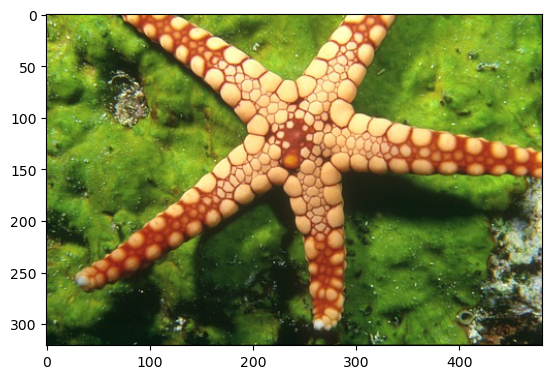

In [12]:
img = plt.imread('star.jpg')
plt.imshow(img)
plt.show()

In [8]:
print(img.shape)
print(img[0,0,:])

(321, 481, 3)
[67 67 55]


In [76]:
test = img[0:3,0:5,:]

In [77]:
test

array([[[ 67,  67,  55],
        [ 64,  66,  42],
        [ 74,  76,  39],
        [124, 123,  77],
        [128, 126,  69]],

       [[ 99, 117,  69],
        [ 90, 105,  46],
        [ 80,  93,  23],
        [ 70,  77,   7],
        [ 82,  84,  18]],

       [[119, 155,  59],
        [175, 206, 102],
        [170, 194,  84],
        [112, 129,  27],
        [ 99, 111,  27]]], dtype=uint8)

In [78]:
img = np.insert(test, 0, np.arange(test.shape[0]), axis=1)

In [79]:
np.arange(test.shape[0]).repeat(test.shape[1]).reshape(test.shape[0], test.shape[1])

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2]])

In [80]:
test.shape

(3, 5, 3)

In [81]:
index_array = np.arange(test.shape[0]).repeat(test.shape[1]) + np.arange(test.shape[1]).repeat(test.shape[0])
index_array

array([0, 0, 0, 1, 1, 2, 3, 3, 3, 4, 5, 5, 6, 6, 6])

In [86]:
x = np.insert(test, 3, np.repeat(np.arange(test.shape[0]), (test.shape[1])).reshape(test.shape[0], test.shape[1]), axis=2)
x

array([[[ 67,  67,  55,   0],
        [ 64,  66,  42,   0],
        [ 74,  76,  39,   0],
        [124, 123,  77,   0],
        [128, 126,  69,   0]],

       [[ 99, 117,  69,   1],
        [ 90, 105,  46,   1],
        [ 80,  93,  23,   1],
        [ 70,  77,   7,   1],
        [ 82,  84,  18,   1]],

       [[119, 155,  59,   2],
        [175, 206, 102,   2],
        [170, 194,  84,   2],
        [112, 129,  27,   2],
        [ 99, 111,  27,   2]]], dtype=uint8)

In [83]:
np.insert(x, 3, np.tile(np.arange(test.shape[1]), (test.shape[0])).reshape(test.shape[0], test.shape[1]), axis=2)

array([[[ 67,  67,  55,   0,   0],
        [ 64,  66,  42,   1,   1],
        [ 74,  76,  39,   2,   2],
        [124, 123,  77,   3,   0],
        [128, 126,  69,   4,   1]],

       [[ 99, 117,  69,   0,   2],
        [ 90, 105,  46,   1,   0],
        [ 80,  93,  23,   2,   1],
        [ 70,  77,   7,   3,   2],
        [ 82,  84,  18,   4,   0]],

       [[119, 155,  59,   0,   1],
        [175, 206, 102,   1,   2],
        [170, 194,  84,   2,   0],
        [112, 129,  27,   3,   1],
        [ 99, 111,  27,   4,   2]]], dtype=uint8)

In [87]:
np.insert(test, test.shape[-1],
                            np.array(np.meshgrid(range(test.shape[0]), range(test.shape[1]))).T, axis=-1)

ValueError: could not broadcast input array from shape (5,2,3) into shape (3,5,3)

In [88]:
np.meshgrid(range(test.shape[0]), range(test.shape[1]))

[array([[0, 1, 2],
        [0, 1, 2],
        [0, 1, 2],
        [0, 1, 2],
        [0, 1, 2]]),
 array([[0, 0, 0],
        [1, 1, 1],
        [2, 2, 2],
        [3, 3, 3],
        [4, 4, 4]])]

In [138]:
indices = np.stack(np.meshgrid(range(test.shape[1]), range(test.shape[0])), axis=-1)
indices

array([[[0, 0],
        [1, 0],
        [2, 0],
        [3, 0],
        [4, 0]],

       [[0, 1],
        [1, 1],
        [2, 1],
        [3, 1],
        [4, 1]],

       [[0, 2],
        [1, 2],
        [2, 2],
        [3, 2],
        [4, 2]]])

In [123]:
test

array([[[ 67,  67,  55],
        [ 64,  66,  42],
        [ 74,  76,  39],
        [124, 123,  77],
        [128, 126,  69]],

       [[ 99, 117,  69],
        [ 90, 105,  46],
        [ 80,  93,  23],
        [ 70,  77,   7],
        [ 82,  84,  18]],

       [[119, 155,  59],
        [175, 206, 102],
        [170, 194,  84],
        [112, 129,  27],
        [ 99, 111,  27]]], dtype=uint8)

In [129]:
print(indices.shape)
print(test.shape)

(2, 5, 3)
(3, 5, 3)


In [145]:
indices = np.indices(test.shape[:2]).transpose(1, 2, 0)
indices

array([[[0, 0],
        [0, 1],
        [0, 2],
        [0, 3],
        [0, 4]],

       [[1, 0],
        [1, 1],
        [1, 2],
        [1, 3],
        [1, 4]],

       [[2, 0],
        [2, 1],
        [2, 2],
        [2, 3],
        [2, 4]]])

In [147]:
print(test.shape)
print(indices.shape)

(3, 5, 3)
(3, 5, 2)


In [148]:
np.concatenate([test, indices], axis=-1)

array([[[ 67,  67,  55,   0,   0],
        [ 64,  66,  42,   0,   1],
        [ 74,  76,  39,   0,   2],
        [124, 123,  77,   0,   3],
        [128, 126,  69,   0,   4]],

       [[ 99, 117,  69,   1,   0],
        [ 90, 105,  46,   1,   1],
        [ 80,  93,  23,   1,   2],
        [ 70,  77,   7,   1,   3],
        [ 82,  84,  18,   1,   4]],

       [[119, 155,  59,   2,   0],
        [175, 206, 102,   2,   1],
        [170, 194,  84,   2,   2],
        [112, 129,  27,   2,   3],
        [ 99, 111,  27,   2,   4]]])